Importing necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

Making a random Teacher rating dataset.

In [ ]:
np.random.seed(42)
random.seed(42)
n = 120
prof_names = [f"Prof_{i}" for i in np.random.randint(1, 95, n)]
gender = np.random.choice(['Male', 'Female'], size=n)
tenure = np.random.choice(['Yes', 'No'], size=n)
beauty = np.random.normal(6, 1.2, n)
rating = np.random.normal(4, 0.5, n)
students = np.random.randint(50, 150, n)
age = np.random.randint(25, 60, n)
division = np.random.choice(['Lower Division', 'Upper Division'], size=n)
outlier_indices = random.sample(range(n), 3)
beauty[outlier_indices[0]] = 10.0
beauty[outlier_indices[1]] = 1.5
students[outlier_indices[2]] = 300

In [ ]:
df = pd.DataFrame({
    'Prof': prof_names,
    'Gender': gender,
    'Tenure': tenure,
    'Beauty': beauty.round(2),
    'Rating': rating.round(2),
    'Students': students,
    'Age': age,
    'Division': division
})

In [ ]:
print("===== Teachers Rating Dataset (First 10 Rows) =====")
print(df.head(10), "\n")

===== Teachers Rating Dataset (First 10 Rows) =====
      Prof  Gender Tenure  Beauty  Rating  Students  Age        Division
0  Prof_52  Female     No    5.66    4.11        62   26  Upper Division
1  Prof_93    Male    Yes    7.28    3.86        95   37  Lower Division
2  Prof_15  Female     No    7.02    4.22        84   35  Upper Division
3  Prof_72    Male    Yes    8.15    4.57       300   47  Lower Division
4  Prof_61  Female     No    6.68    4.25       131   40  Lower Division
5  Prof_21    Male     No    5.80    4.53       118   55  Upper Division
6  Prof_83    Male     No    5.83    3.67        96   35  Upper Division
7  Prof_87  Female     No    3.68    3.57        74   40  Upper Division
8  Prof_75  Female    Yes    6.18    3.73       115   32  Upper Division
9  Prof_75  Female     No    5.98    3.37        59   28  Lower Division 



Q1. Can you identify whether teachers Rating Data is a time serires or cross sectional?

Ans) The Teachers Rating Data is a cross-sectional dataset as a time series dataset tracks how one entity’s values change over time (e.g., a teacher’s rating each month for several years) but here we captures different entities at a single point in time (e.g., multiple teachers’ ratings collected during one semester).

Q2. Find the mean, median, minimum and maximum values for the students.

In [ ]:
mean_students = df['Students'].mean()
median_students = df['Students'].median()
min_students = df['Students'].min()
max_students = df['Students'].max()

print("Mean:", round(mean_students, 2))
print("Median:", round(median_students, 2))
print("Minimum:", min_students)
print("Maximum:", max_students)


Mean: 102.66
Median: 102.0
Minimum: 50
Maximum: 300


Q3. Produce the descriptive statistics table.

In [ ]:
df.describe()

,Beauty,Rating,Students,Age
count,120.000000,120.000000,120.000000,120.000000
mean,6.041083,3.944083,102.658333,41.408333
std,1.330214,0.514630,34.711898,10.064077
min,1.500000,2.720000,50.000000,25.000000
25%,5.300000,3.580000,77.500000,32.000000
50%,5.965000,3.915000,102.000000,42.000000
75%,6.737500,4.252500,128.000000,50.000000
max,10.000000,5.630000,300.000000,59.000000


Q4. Create a histogram of the beauty variable and breifly comment on the distribution of the data.

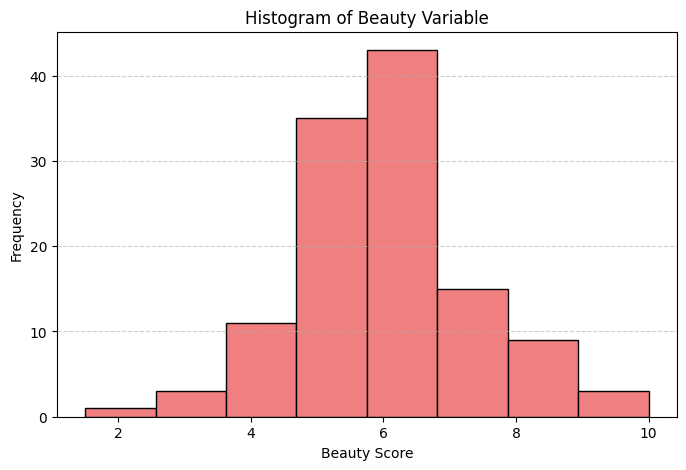

In [ ]:
plt.figure(figsize=(8,5))
plt.hist(df['Beauty'], bins=8, color='lightcoral', edgecolor='black')
plt.title('Histogram of Beauty Variable')
plt.xlabel('Beauty Score')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

The distribution is approximately normal (bell-shaped) with most scores around the mean (≈6).

However, there are visible outliers:

->One unusually high beauty score (~10)

->One unusually low beauty score (~1.5)

These outliers cause slight skewness in the data.

Q5. Does average beauty score differ by gender? Produce the means and standard deviations for both male and female instructors 6

In [ ]:
beauty_by_gender = df.groupby('Gender')['Beauty'].agg(['mean', 'std', 'count']).round(2)
print(beauty_by_gender)


        mean   std  count
Gender                   
Female  6.03  1.36     54
Male    6.05  1.32     66


Female mean beauty score = 6.03, Male mean = 6.05


->On average, Both genders have equal beauty score with male slightly leading.


->The difference is moderate, but both distributions have similar variability.

The average beauty score differs slightly by gender so male instructors tend to have higher mean beauty scores than female instructors, though both groups show comparable variation in scores.

Q6. Calculate the percentage of males and females that are tenured professors. Will you say that tenure status differ by gender?

In [ ]:
tenure_counts = df.groupby(['Gender', 'Tenure']).size().unstack(fill_value=0)
tenure_counts['% Tenured'] = round((tenure_counts['Yes'] / tenure_counts.sum(axis=1)) * 100, 2)
print(tenure_counts)


Tenure  No  Yes  % Tenured
Gender                    
Female  30   24      44.44
Male    31   35      53.03


->Yes, in this dataset male instructors have a higher tenure percentage than females.

->Females have a higher proportion of tenured professors than males.

This shows a gender-based difference in tenure, at least in this small sample.

In [ ]:
df.to_csv('teachers_rating_dataset.csv', index=False)
print("Dataset exported successfully as 'teachers_rating_dataset.csv'.")

Dataset exported successfully as 'teachers_rating_dataset.csv'.
